In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2022-12-28 15:02:39.001442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 15:02:39.252152: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-28 15:02:39.329465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-28 15:02:39.329486: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

--2022-12-28 15:03:09--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M  1.97MB/s    in 33s     

2022-12-28 15:03:43 (2.03 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating:

  inflating: cats_and_dogs/train/dogs/dog.21.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.21.jpg  
  inflating: cats_and_dogs/train/dogs/dog.158.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.158.jpg  
  inflating: cats_and_dogs/train/dogs/dog.35.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.35.jpg  
  inflating: cats_and_dogs/train/dogs/dog.819.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.819.jpg  
  inflating: cats_and_dogs/train/dogs/dog.831.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.831.jpg  
  inflating: cats_and_dogs/train/dogs/dog.825.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.825.jpg  
  inflating: cats_and_dogs/train/dogs/dog.824.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.824.jpg  
  inflating: cats_and_dogs/train/dogs/dog.830.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.830.jpg  
  inflating: cats_and_dogs/train/dogs/dog.818.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.729.jpg  
  inflating: cats_and_dogs/train/dogs/dog.926.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.926.jpg  
  inflating: cats_and_dogs/train/dogs/dog.932.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.932.jpg  
  inflating: cats_and_dogs/train/dogs/dog.503.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.503.jpg  
  inflating: cats_and_dogs/train/dogs/dog.265.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.265.jpg  
  inflating: cats_and_dogs/train/dogs/dog.271.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.271.jpg  
  inflating: cats_and_dogs/train/dogs/dog.517.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.517.jpg  
  inflating: cats_and_dogs/train/dogs/dog.259.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.259.jpg  
  inflating: cats_and_dogs/train/dogs/dog.477.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.477.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/dogs/dog.295.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.295.jpg  
  inflating: cats_and_dogs/train/dogs/dog.281.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.281.jpg  
  inflating: cats_and_dogs/train/dogs/dog.478.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.478.jpg  
  inflating: cats_and_dogs/train/dogs/dog.322.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.322.jpg  
  inflating: cats_and_dogs/train/dogs/dog.444.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.444.jpg  
  inflating: cats_and_dogs/train/dogs/dog.450.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.450.jpg  
  inflating: cats_and_dogs/train/dogs/dog.336.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.336.jpg  
  inflating: cats_and_dogs/train/dogs/dog.487.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.487.jpg  
  inflating: cats_and_dogs/train/dogs/dog.493.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/dogs/dog.626.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.626.jpg  
  inflating: cats_and_dogs/train/dogs/dog.140.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.140.jpg  
  inflating: cats_and_dogs/train/dogs/dog.815.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.815.jpg  
  inflating: cats_and_dogs/train/dogs/dog.801.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.801.jpg  
  inflating: cats_and_dogs/train/dogs/dog.197.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.197.jpg  
  inflating: cats_and_dogs/train/dogs/dog.829.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.829.jpg  
  inflating: cats_and_dogs/train/dogs/dog.183.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.183.jpg  
  inflating: cats_and_dogs/train/dogs/dog.182.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.182.jpg  
  inflating: cats_and_dogs/train/dogs/dog.196.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.207.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.207.jpg  
  inflating: cats_and_dogs/train/cats/cat.549.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.549.jpg  
  inflating: cats_and_dogs/train/cats/cat.777.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.777.jpg  
  inflating: cats_and_dogs/train/cats/cat.763.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.763.jpg  
  inflating: cats_and_dogs/train/cats/cat.993.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.993.jpg  
  inflating: cats_and_dogs/train/cats/cat.4.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.4.jpg  
  inflating: cats_and_dogs/train/cats/cat.987.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.987.jpg  
  inflating: cats_and_dogs/train/cats/cat.978.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.978.jpg  
  inflating: cats_and_dogs/train/cats/cat.788.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/cats/cat.50.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.50.jpg  
  inflating: cats_and_dogs/train/cats/cat.885.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.885.jpg  
  inflating: cats_and_dogs/train/cats/cat.675.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.675.jpg  
  inflating: cats_and_dogs/train/cats/cat.78.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.78.jpg  
  inflating: cats_and_dogs/train/cats/cat.113.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.113.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.661.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.661.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.660.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/cats/cat.522.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.522.jpg  
  inflating: cats_and_dogs/train/cats/cat.536.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.536.jpg  
  inflating: cats_and_dogs/train/cats/cat.250.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.250.jpg  
  inflating: cats_and_dogs/train/cats/cat.495.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.495.jpg  
  inflating: cats_and_dogs/train/cats/cat.481.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.481.jpg  
  inflating: cats_and_dogs/train/cats/cat.318.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.318.jpg  
  inflating: cats_and_dogs/train/cats/cat.330.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.330.jpg  
  inflating: cats_and_dogs/train/cats/cat.456.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.456.jpg  
  inflating: cats_and_dogs/train/cats/cat.442.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.219.jpg  
  inflating: cats_and_dogs/train/cats/cat.580.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.580.jpg  
  inflating: cats_and_dogs/train/cats/cat.594.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.594.jpg  
  inflating: cats_and_dogs/train/cats/cat.999.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.999.jpg  
  inflating: cats_and_dogs/train/cats/cat.741.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.741.jpg  
  inflating: cats_and_dogs/train/cats/cat.755.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.755.jpg  
  inflating: cats_and_dogs/train/cats/cat.769.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.769.jpg  
  inflating: cats_and_dogs/train/cats/cat.782.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.782.jpg  
  inflating: cats_and_dogs/train/cats/cat.796.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.796.jpg  
  inflating: cats

  inflating: cats_and_dogs/validation/dogs/dog.2111.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2111.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2139.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2139.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2071.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2071.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2065.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2065.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2059.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2059.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2298.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2298.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2273.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2273.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2267.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/dogs/dog.2229.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2229.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2215.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2215.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2201.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2201.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2218.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2218.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2224.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2224.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2230.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2230.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2026.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2026.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2032.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2481.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2495.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2495.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2494.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2494.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2480.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2480.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2457.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2457.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2331.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2331.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2325.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2325.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2443.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2443.jpg  
  inflating: cats_and_dogs/validation/dogs

  inflating: cats_and_dogs/validation/cats/cat.2286.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2286.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2292.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2292.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2457.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2457.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2331.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2331.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2325.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2325.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2443.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2443.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2319.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2319.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2494.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2166.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2172.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2172.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2199.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2199.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2198.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2198.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2173.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2173.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2167.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2167.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2359.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2359.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2417.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2417.jpg  
  inflating: cats_and_dogs/validation/cats

In [3]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
total_train, total_val, total_test

(2001, 1001, 51)

In [130]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = train_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [21]:
type(test_data_gen)

keras.preprocessing.image.DirectoryIterator

In [69]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

In [64]:
# get a batch of training images and labels
sample_training_images, sample_training_labels = next(train_data_gen)

In [65]:
len(sample_training_images), len(sample_training_labels)

(128, 128)

In [66]:
sample_training_labels

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

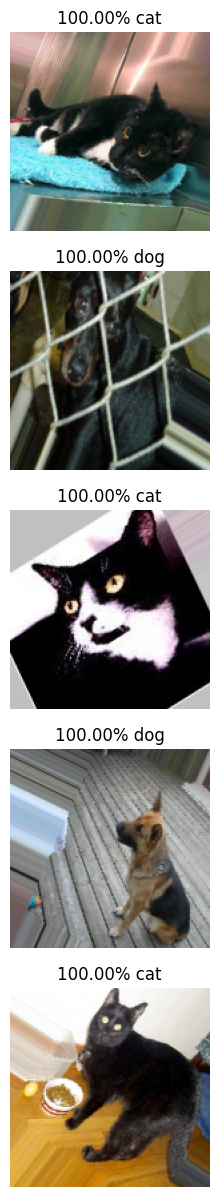

In [68]:
plotImages(sample_training_images[:5], probabilities=sample_training_labels[:5])

In [47]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

Found 2000 images belonging to 2 classes.


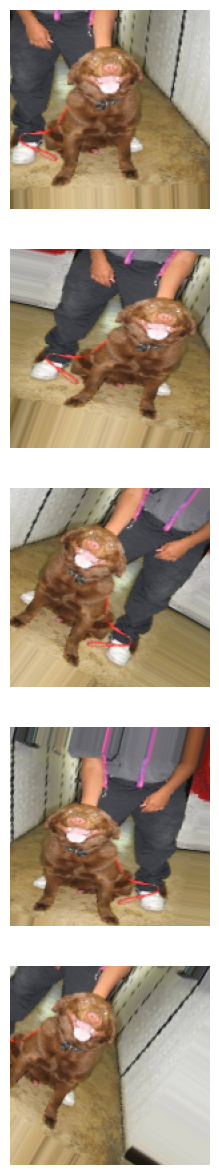

In [48]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [83]:
# 7

# Set up convolutional base
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2))) # now 75,75
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2))) # now 37,37
model.add(Conv2D(64, (3,3), activation='relu'))

# dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# one output neuron, sigmoid activation will make it between 0 (cat) - 1 (dog)
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 33, 33, 64)        18496     
                                                                 
 flatten_5 (Flatten)         (None, 69696)            

## Cell 8

Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [84]:
# 8
# Use BinaryCrossentropy for binary labels
# from_logits = True means use logits (i.e value in [-inf, inf])
# from_logits = False means use probaility (i.e. value in [0., 1.])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [86]:
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=epochs)

Epoch 1/15
16/16 [==============================] - 15s 915ms/step - loss: 0.7376 - accuracy: 0.5375 - val_loss: 0.6914 - val_accuracy: 0.5090
Epoch 2/15
16/16 [==============================] - 16s 1s/step - loss: 0.6923 - accuracy: 0.5400 - val_loss: 1.0938 - val_accuracy: 0.5000
Epoch 3/15
16/16 [==============================] - 16s 986ms/step - loss: 0.7134 - accuracy: 0.5400 - val_loss: 0.6757 - val_accuracy: 0.5570
Epoch 4/15
16/16 [==============================] - 15s 960ms/step - loss: 0.6878 - accuracy: 0.5505 - val_loss: 0.6649 - val_accuracy: 0.6310
Epoch 5/15
16/16 [==============================] - 16s 984ms/step - loss: 0.8040 - accuracy: 0.5735 - val_loss: 0.6779 - val_accuracy: 0.5110
Epoch 6/15
16/16 [==============================] - 16s 1s/step - loss: 0.6698 - accuracy: 0.5855 - val_loss: 0.6479 - val_accuracy: 0.6150
Epoch 7/15
16/16 [==============================] - 16s 1s/step - loss: 0.6674 - accuracy: 0.6005 - val_loss: 0.6569 - val_accuracy: 0.5920
Epoch 8/

## Cell 9

Run this cell to visualize the accuracy and loss of the model.

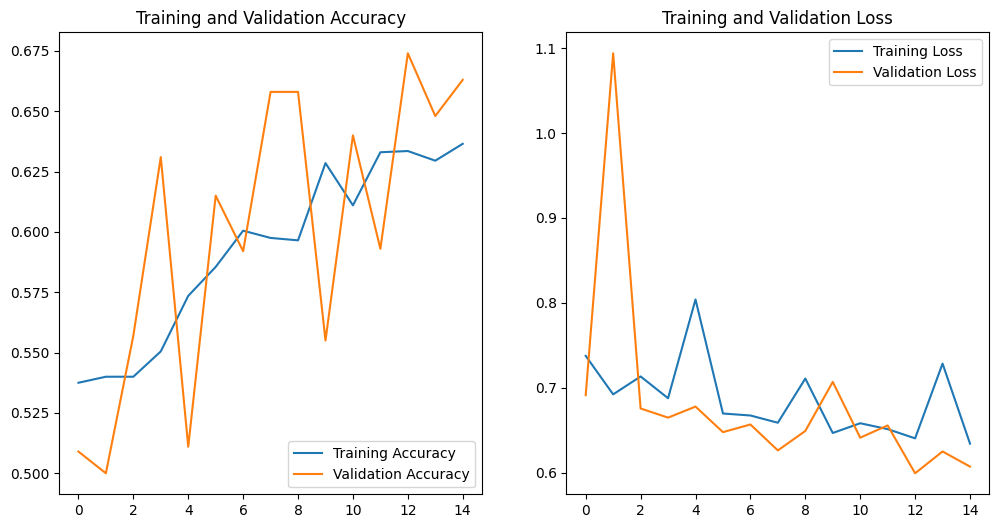

In [145]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Cell 10

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [105]:
# 10
probabilities = np.ndarray.flatten(model.predict(test_data_gen))

2/2 [==============================] - 0s 22ms/step


In [107]:
probabilities

array([0.51011586, 0.49861816, 0.2385722 , 0.6336898 , 0.48786703,
       0.54252064, 0.6474978 , 0.32271922, 0.53161806, 0.84261984,
       0.5206875 , 0.6080678 , 0.5135175 , 0.24354285, 0.5731897 ,
       0.58269036, 0.47591636, 0.7230239 , 0.66924065, 0.6223822 ,
       0.2388868 , 0.6250752 , 0.6101161 , 0.45858142, 0.56215125,
       0.47973427, 0.59966826, 0.47940508, 0.4371583 , 0.6057886 ,
       0.31038007, 0.38670605, 0.65539056, 0.99565876, 0.50921875,
       0.6540674 , 0.9617022 , 0.5898794 , 0.61491   , 0.58416855,
       0.531468  , 0.61669713, 0.80386245, 0.47434673, 0.3592912 ,
       0.45726842, 0.5742667 , 0.40978286, 0.19018869, 0.3240075 ],
      dtype=float32)

In [103]:
probabilities = np.ndarray.flatten(probabilities)

In [108]:
dir(train_data_gen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [131]:
test_data_gen.batch_size

128

In [139]:
test_data_gen.reset()

In [140]:
test_images = test_data_gen.next()

In [141]:
len(test_images)

50

In [142]:
test_images.shape

(50, 150, 150, 3)

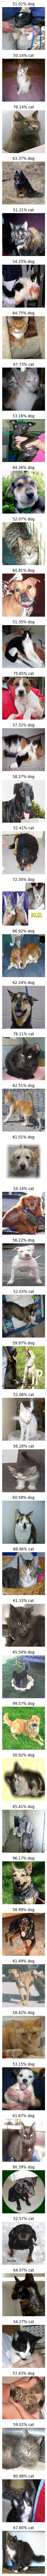

In [143]:
plotImages(test_images, probabilities=probabilities)

## Cell 11

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [104]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
